In [65]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
# load dataset
df_test =pd.read_csv('test.csv')
df_train =pd.read_csv('train.csv')

Df_merge=pd.merge(df_train,df_test)
# replace with the data
df_test.head()
df_train.head()


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [54]:
# Step 2: Exploratory Data Analysis (EDA)

# Check for missing values
df_test.isnull().sum()
df_train.isnull().sum()

# Basic statistics of each column
df_test.describe()
df_train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


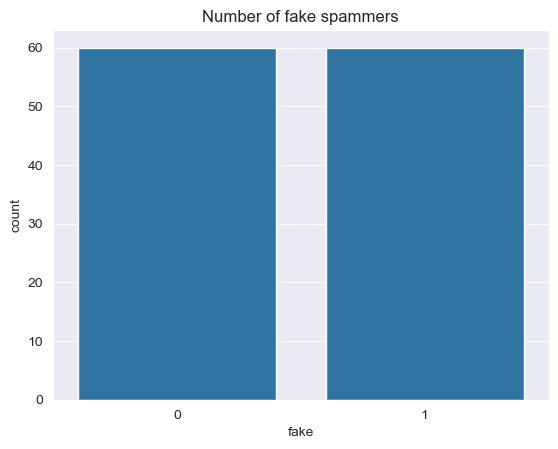

In [55]:
#Distribution of Target Variable

#  Plotting the distribution of fake and genuine accounts
sns.countplot(x='fake' , data=df_test)
plt.title('Number of fake spammers')
plt.show()


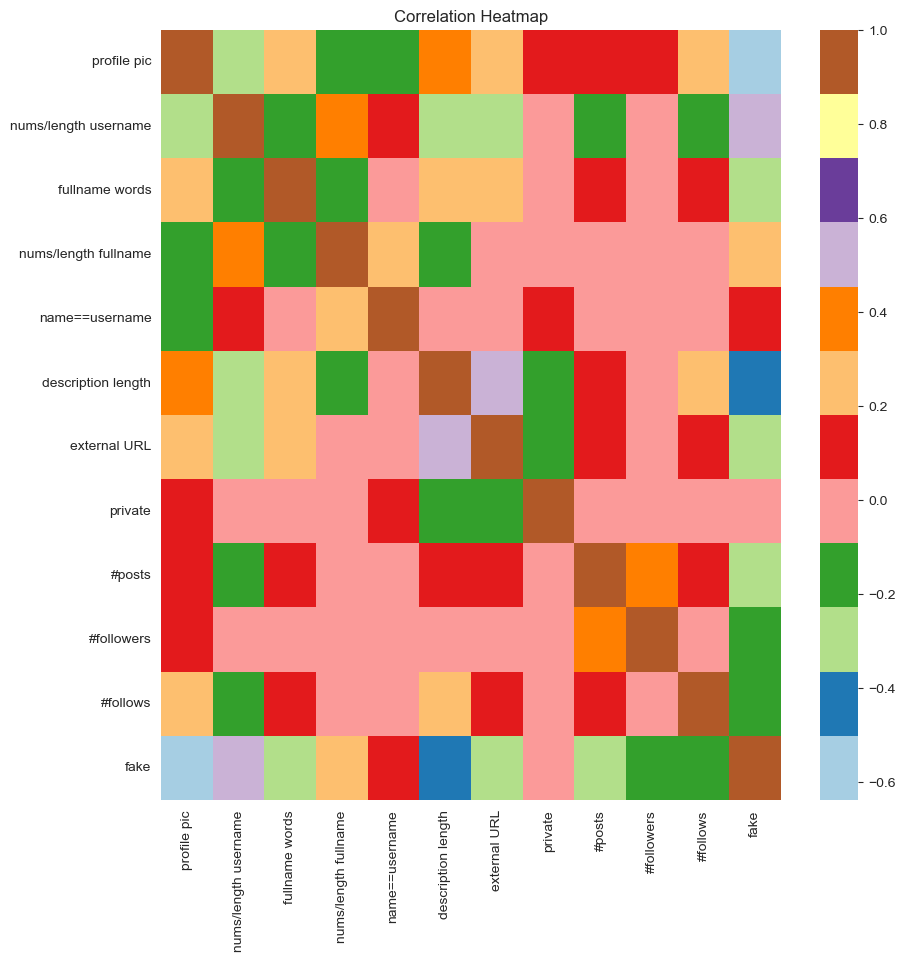

In [56]:
# Correlation Analysis

# correlation matrix
correlation = df_train.corr()
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.heatmap(correlation, cmap=plt.cm.Paired)
plt.title('Correlation Heatmap')
plt.show()

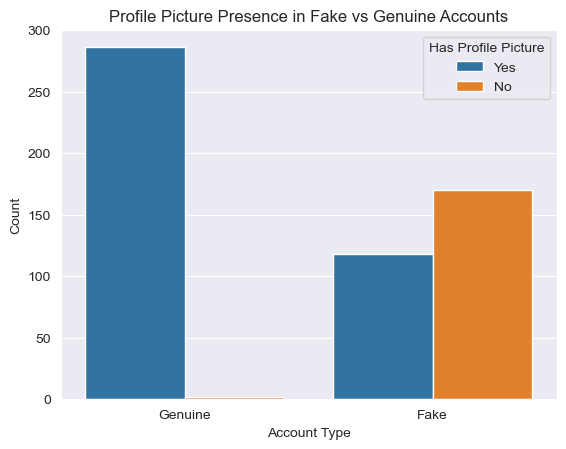

In [57]:
# Visualization of Key Features
#Profile Picture (Fake vs. Genuine):
# Optional: map 'fake' for better labeling
df_train['account_type'] = df_train['fake'].map({1: 'Fake', 0: 'Genuine'})

# Convert 'profile pic' column into a more readable category
df_train['has_profile_pic'] = df_train['profile pic'].map({1: 'Yes', 0: 'No'})

# Plot
sns.countplot(x='account_type', hue='has_profile_pic', data=df_train)
plt.title("Profile Picture Presence in Fake vs Genuine Accounts")
plt.xlabel("Account Type")
plt.ylabel("Count")
plt.legend(title="Has Profile Picture")
plt.show()


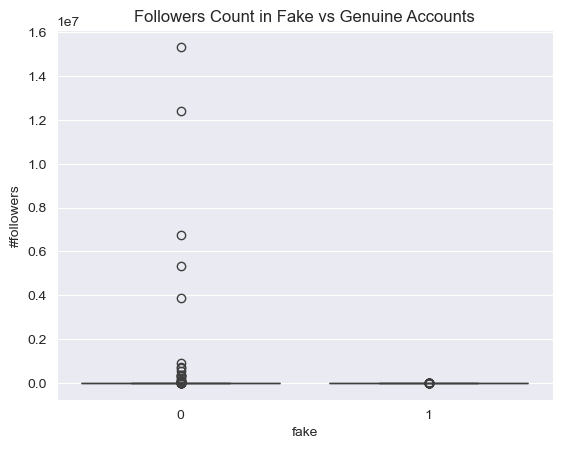

In [58]:
# Followers and Following Counts:
sns.boxplot(x='fake', y='#followers', data=df_train)
plt.title("Followers Count in Fake vs Genuine Accounts")
plt.show()

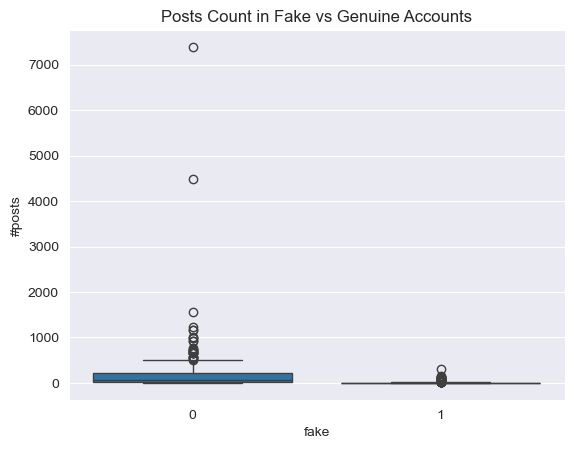

In [59]:
# Posts Count:
sns.boxplot(x='fake', y='#posts', data=df_train)
plt.title("Posts Count in Fake vs Genuine Accounts")
plt.show()

In [60]:
# Step 3: Data Preprocessing

# Separate features and target
X = df_train.drop('fake', axis=1)
y = df_train['fake']

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, drop_first=True)

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Combine scaled features and target
scaled_data = pd.DataFrame(X_scaled, columns=X_encoded.columns)
scaled_data['fake'] = y



In [61]:
#Step 4: Model Building
# Split data into training and test sets
X = scaled_data.drop('fake' , axis=1)
y = scaled_data['fake']
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Build Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

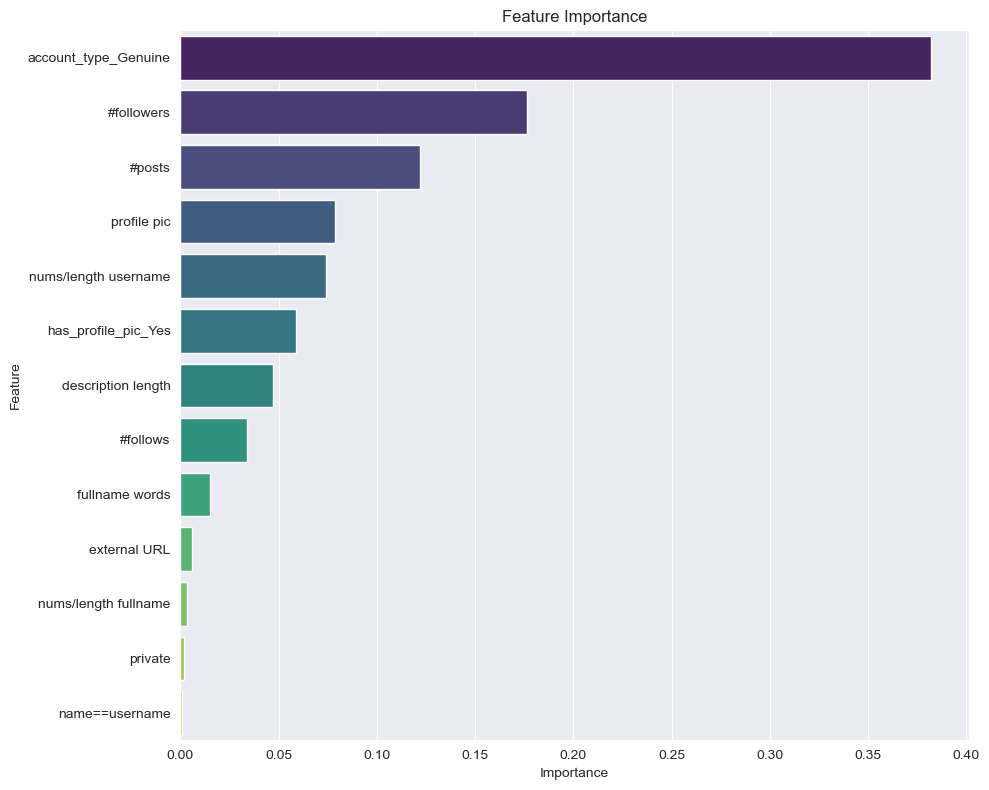

In [63]:
# Feature Importance Plot
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns[indices]
sorted_importances = importances[indices]

plt.figure(figsize=(10, 8))
sns.barplot(x=sorted_importances, y=features, hue=features, palette='viridis', legend=False)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        53

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116

Confusion Matrix:
 [[63  0]
 [ 0 53]]


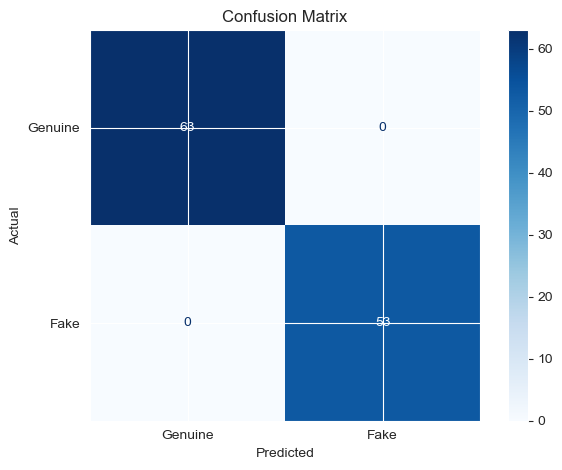

In [64]:
# Step 5: Model Evaluation

# Make predictions
Y_pred = model.predict(X_test)

# Text reports
print("Classification Report:\n", classification_report(y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, Y_pred))

# Visual display of confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    Y_pred,
    display_labels=['Genuine', 'Fake'],
    cmap='Blues'
)

disp.ax_.set_title('Confusion Matrix')
disp.ax_.set_xlabel('Predicted')
disp.ax_.set_ylabel('Actual')
plt.tight_layout()
plt.show()